# Scatterplot with Different Marker Sizes and Colours
In this example we demonstrate how to modify the size of the points in a Scatterplot. This is useful when we want the size to represent something, e.g., the weight of a parcel in kilograms.

In [1]:
import matplotlib.pyplot as plt
from random import random

For this example our data will just be randomly generated points. Here we define a function to return a list of randomly generated numbers.

In [2]:
def random_values(count=50):
    """
    Returns a list of random numbers between 0 (inclusive) and 1 (exclusive).
    By default, the function returns a list of 50 numbers.
    """
    return [random() for _ in range(count)]

We'll store our data in a Pandas DataFrame

In [3]:
import pandas as pd

In [4]:
df = pd.DataFrame()

We can go ahead and use our function to generate our points.

In [5]:
df['X'] = random_values()
df['Y'] = random_values()

In [6]:
df.head()

,X,Y
0,0.843513,0.684042
1,0.602221,0.972866
2,0.041865,0.097165
3,0.945940,0.701573
4,0.314311,0.631125


Here we now create another Series of randomly generated numbers to represent different colours.

In [7]:
df['Colour'] = random_values()

In [8]:
df.head()

,X,Y,Colour
0,0.843513,0.684042,0.061531
1,0.602221,0.972866,0.583542
2,0.041865,0.097165,0.767407
3,0.945940,0.701573,0.565111
4,0.314311,0.631125,0.301624


And here we create yet another Series of random numbers, this time scaled by a constant value. These will determine the size of the points we're going to plot.

In [9]:
SCALING_FACTOR = 1000

df['Size'] = [random_number * SCALING_FACTOR for random_number in random_values()]

Before we visualize the data, let's just look at the DataFrame to get an idea of what we've got.

In [10]:
df.head()

,X,Y,Colour,Size
0,0.843513,0.684042,0.061531,446.127221
1,0.602221,0.972866,0.583542,911.252646
2,0.041865,0.097165,0.767407,258.588413
3,0.945940,0.701573,0.565111,943.477585
4,0.314311,0.631125,0.301624,253.047974


## Visualize the Data

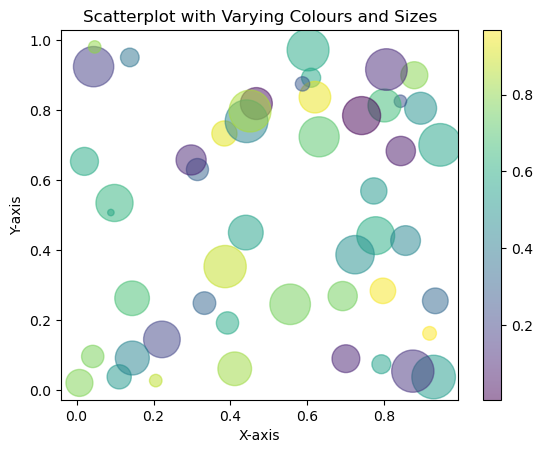

In [11]:
# Scatter plot with varying colors and sizes
plt.scatter(x=df['X'],
            y=df['Y'],
            c=df['Colour'],
            s=df['Size'],
            alpha=0.5,
            # Built-in colormap e.g. 'viridis', 'plasma', 'coolwarm', 'inferno', 'rainbow', 'magma', 'cividis', 'twilight'
            cmap='viridis'
            )

plt.colorbar()  # Show colour scale (note the color spelling in colorbar - Matplotlib uses American English)

plt.title("Scatterplot with Varying Colours and Sizes")
plt.xlabel("X-axis")
plt.ylabel("Y-axis")

plt.show()

## Colours with Categorical Data

Here we add another new column called ItemID. This will just hold random integers to represent some kind of ID.

In [12]:
from random import randint
df['ItemID'] = [randint(0, 3) for _ in range(len(df))]

Let's check that it's there.

In [13]:
df.sample(15)

,X,Y,Colour,Size,ItemID
23,0.773316,0.569960,0.514660,357.350471,3
43,0.144323,0.263358,0.677246,621.808630,1
28,0.778265,0.442275,0.599465,743.150042,2
2,0.041865,0.097165,0.767407,258.588413,0
14,0.044124,0.924997,0.175807,842.884485,3
25,0.007278,0.021560,0.777626,377.059123,2
15,0.610074,0.893365,0.573481,189.883290,2
7,0.110727,0.038959,0.511453,304.107045,3
1,0.602221,0.972866,0.583542,911.252646,2
13,0.928958,0.038403,0.530104,984.876273,1


### Scatter plot for categorical data with discrete colormap

Here we use a discrete colormap - there should only be as many colours as there are unique values of ItemID.

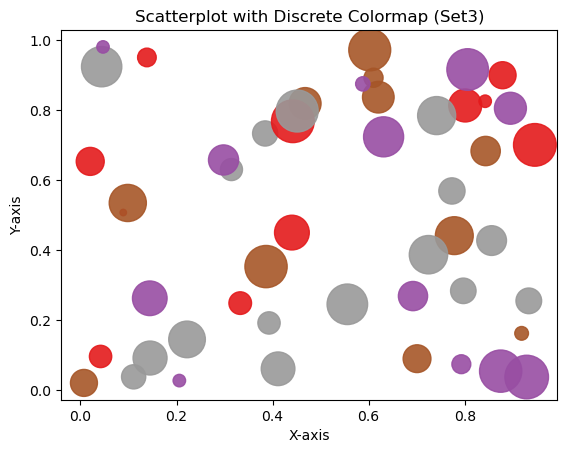

In [14]:
plt.scatter(
    x=df['X'],
    y=df['Y'],
    c=df['ItemID'],
    s=df['Size'],
    alpha=0.9,
    cmap='Set1'  # A discrete colormap from Matplotlib
)

plt.title("Scatterplot with Discrete Colormap (Set3)")
plt.xlabel("X-axis")
plt.ylabel("Y-axis")
plt.show()

### Custom colour map (Colormap)
We might prefer to use our own colour palette.

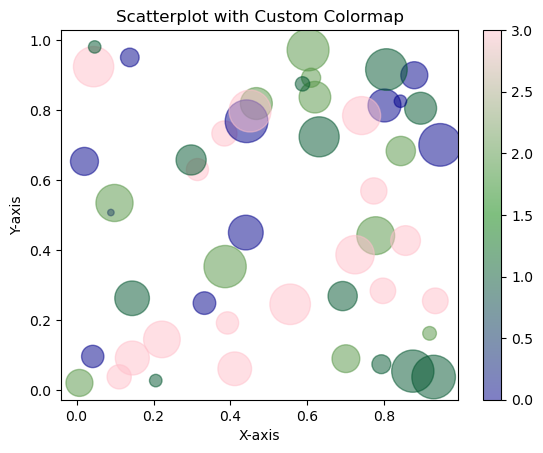

In [15]:
import matplotlib.colors as mcolors

# Define a custom color list
my_colours = ["darkblue", "green", "pink"]

# Create a custom colormap
my_cmap = mcolors.LinearSegmentedColormap.from_list("my_cmap", my_colours)

plt.scatter(
    x=df['X'],
    y=df['Y'],
    c=df['ItemID'],
    s=df['Size'],
    alpha=0.5,
    cmap=my_cmap  # Use the custom colormap
)

plt.colorbar()
plt.title("Scatterplot with Custom Colormap")
plt.xlabel("X-axis")
plt.ylabel("Y-axis")
plt.show()

### Category to colour mapping
We might also want to map specific colours to particular categories. We will create a new Fruit column and associate different types of fruit with different colours.

In [16]:
from random import choice

# Oops, we've added DVD Players and Energy Drinks into the Fruit column.
# Not to worry, we'll handle for unexpected values.
df['Fruit'] = [choice(['Apple', 'Banana', 'Cherry', 'DVD Player', 'Energy Drink']) for _ in range(len(df))]

df.sample(10)

,X,Y,Colour,Size,ItemID,Fruit
4,0.314311,0.631125,0.301624,253.047974,3,Energy Drink
11,0.801012,0.814109,0.660972,563.777420,0,Cherry
20,0.741484,0.785253,0.005236,750.482217,3,Apple
49,0.332601,0.249565,0.314137,265.664684,0,DVD Player
32,0.386349,0.353899,0.878583,925.834482,2,Cherry
23,0.773316,0.569960,0.514660,357.350471,3,Energy Drink
48,0.855957,0.428236,0.445100,458.636307,3,Energy Drink
10,0.440214,0.451041,0.555924,626.243858,0,Apple
13,0.928958,0.038403,0.530104,984.876273,1,Cherry
8,0.842496,0.826245,0.242798,80.940412,0,Cherry


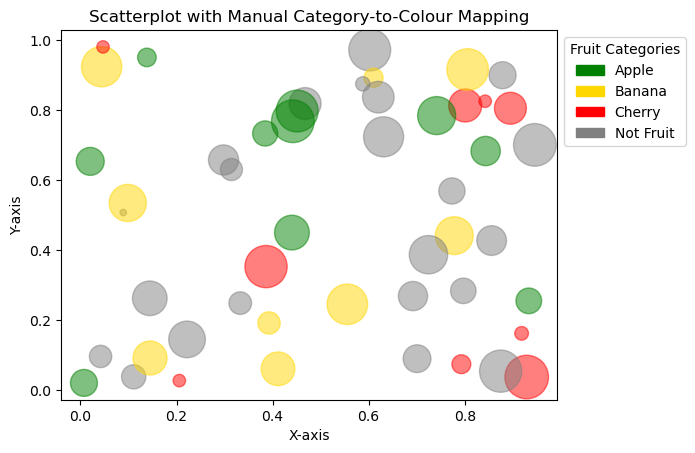

In [17]:
import matplotlib.patches as mpatches

# Dictionary mapping categories to specific colors
fruit_category_colours = {
    'Apple': 'green',
    'Banana': 'gold',
    'Cherry': 'red'
}

# Map df['Colour'] (categories) to actual colour codes
# Any category not in 'category_colours' becomes 'grey'
# This will apply to our DVD Players and Energy Drinks
colour_values = df['Fruit'].map(fruit_category_colours).fillna('grey')

plt.scatter(
    x=df['X'],
    y=df['Y'],
    c=colour_values,
    s=df['Size'],
    alpha=0.5
)

plt.title("Scatterplot with Manual Category-to-Colour Mapping")
plt.xlabel("X-axis")
plt.ylabel("Y-axis")

# Construct custom legend entries for each fruit in the dictionary
# plus a 'Not Fruit' patch for any unmapped category.
legend_entries = []
for fruit_name, color in fruit_category_colours.items():
    legend_entries.append(mpatches.Patch(color=color, label=fruit_name))

# Add an entry for 'Not Fruit' (grey)
legend_entries.append(mpatches.Patch(color='grey', label='Not Fruit'))

# Display the custom legend
plt.legend(handles=legend_entries,
           title="Fruit Categories",
           bbox_to_anchor=(1, 1))  # move the legend outside the main plot area

plt.show()